In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
from sklearn.model_selection import GridSearchCV

In [142]:
male_data = pd.read_csv ('male.csv')
female_data = pd.read_csv('female.csv')

In [143]:
male_data

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,29442,235,1353,312,216,1263,228,193,384,318,...,Combat Arms,11B,Colorado,51,Blackfoot Cherokee Choctaw,1,22,67,160,Right hand
4078,29443,247,1473,336,234,1346,253,196,428,374,...,Combat Arms,91B,Oklahoma,1,NaN,1,22,71,194,Right hand
4079,29447,264,1394,313,227,1280,245,193,407,367,...,Combat Arms,13B,Oklahoma,1,NaN,1,23,67,186,Right hand
4080,29451,203,1417,327,223,1314,250,196,419,365,...,Combat Arms,13P,Oklahoma,1,NaN,1,22,69,165,Right hand


In [144]:
female_data[['stature', 'weightkg' , 'chestbreadth']]

,stature,weightkg,chestbreadth
0,1560,657,274
1,1665,534,261
2,1711,663,287
3,1660,782,269
4,1572,886,305
...,...,...,...
1981,1687,832,290
1982,1613,717,291
1983,1644,762,285
1984,1616,632,270


In [145]:
male_data[['stature','weightkg' ,'chestbreadth']]

,stature,weightkg,chestbreadth
0,1776,815,291
1,1702,726,269
2,1735,929,288
3,1655,794,296
4,1914,946,304
...,...,...,...
4077,1688,675,266
4078,1765,896,323
4079,1690,832,290
4080,1718,731,284


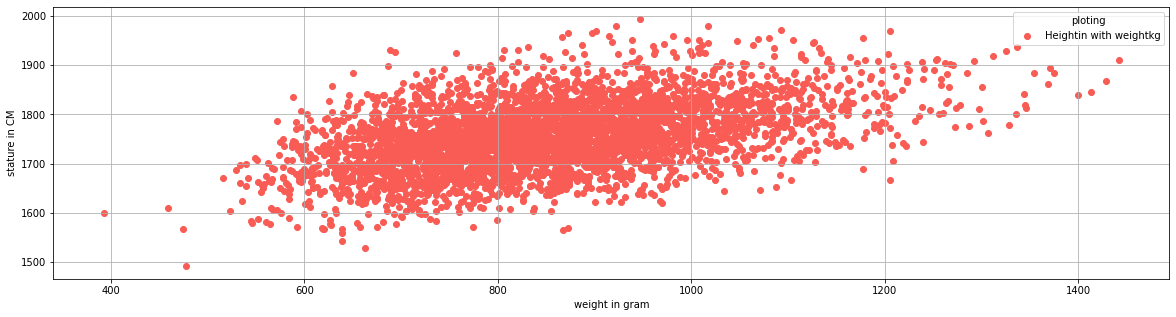

In [146]:
fig = plt.figure(figsize=(20,5))
plt.scatter(x=male_data['weightkg'] , y = male_data['stature'] , color = '#F85C54')
plt.legend(['Heightin with weightkg'] , loc = 'upper right' , title = 'ploting')
plt.xlabel('weight in gram')
plt.ylabel('stature in CM')
plt.grid()
plt.show()

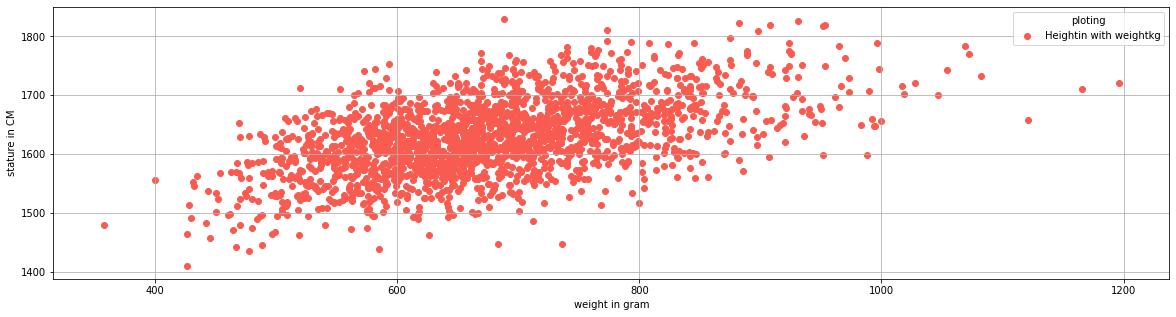

In [147]:
fig =plt.figure(figsize=(20,5) )
plt.scatter(x=female_data['weightkg'] , y = female_data['stature'], color = '#F85C50' )
plt.legend(['Heightin with weightkg'] , loc = 'upper right' , title = 'ploting')
plt.xlabel('weight in gram')
plt.ylabel('stature in CM')
plt.grid()
plt.show()

In [148]:
male_data[['stature','weightkg' ,'chestbreadth']]
female_data[['stature','weightkg' ,'chestbreadth']]


,stature,weightkg,chestbreadth
0,1560,657,274
1,1665,534,261
2,1711,663,287
3,1660,782,269
4,1572,886,305
...,...,...,...
1981,1687,832,290
1982,1613,717,291
1983,1644,762,285
1984,1616,632,270


In [68]:
male_now_data = pd.DataFrame(male_data[['stature','weightkg' ,'chestbreadth']])
female_new_data = pd.DataFrame(female_data[['stature','weightkg' ,'chestbreadth']])
print(type(male_now_data) , type(female_new_data))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [83]:
male_now_data.dropna()
male_now_data.describe()

,stature,weightkg,chestbreadth
count,4082.000000,4082.000000,4082.000000
mean,1756.214601,855.239588,289.441450
std,68.550788,142.206992,18.279344
min,1491.000000,393.000000,231.000000
25%,1710.000000,756.000000,277.000000
50%,1755.000000,846.000000,289.000000
75%,1802.000000,944.000000,301.000000
max,1993.000000,1442.000000,363.000000


In [84]:
female_new_data.dropna()
female_new_data.describe()

,stature,weightkg,chestbreadth
count,1986.000000,1986.000000,1986.000000
mean,1628.473313,677.582075,269.329809
std,64.199512,109.846458,18.582988
min,1409.000000,358.000000,213.000000
25%,1586.250000,601.000000,257.000000
50%,1626.000000,668.000000,268.000000
75%,1672.000000,745.750000,281.000000
max,1829.000000,1196.000000,348.000000


In [85]:
male_now_data.to_csv('male_now_data.csv', index= False)
female_new_data.to_csv('female_new_data.csv', index= False)

In [149]:
print(female_new_data.head(5))

   stature  weightkg  chestbreadth
0     1560       657           274
1     1665       534           261
2     1711       663           287
3     1660       782           269
4     1572       886           305


In [150]:
print(male_now_data.head(5))


   stature  weightkg  chestbreadth
0     1776       815           291
1     1702       726           269
2     1735       929           288
3     1655       794           296
4     1914       946           304


In [151]:
data = pd.read_csv('male_new_data.csv')
data.describe()

,stature,weightkg,chestbreadth
count,4082.000000,4082.000000,4082.000000
mean,1756.214601,855.239588,289.441450
std,68.550788,142.206992,18.279344
min,1491.000000,393.000000,231.000000
25%,1710.000000,756.000000,277.000000
50%,1755.000000,846.000000,289.000000
75%,1802.000000,944.000000,301.000000
max,1993.000000,1442.000000,363.000000


In [152]:
x = pd.DataFrame(data , columns=['stature' , 'weightkg']).values
y = data.chestbreadth.values.reshape(-1,1)

In [156]:
x_train , x_test , y_train , y_test = train_test_split (x, y, test_size = 0.3 , random_state = 0)


In [157]:
train_Acc_K = []
test_Acc = []
neighbors_range = range (1 , 25)
for neighbors in neighbors_range:
    knn = KNeighborsClassifier ( neighbors)
    knn.fit(x_train , y_train.ravel())
    y_prict = knn.predict(x_test)
    train_Acc_K.append(knn.score(x_train , y_train))
    test_Acc.append(knn.score(x_test , y_test))

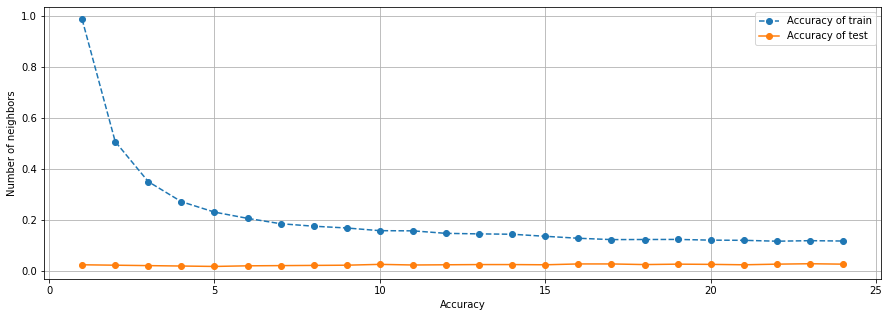

In [163]:
fig = plt.figure(figsize=(15,5))
plt.plot(neighbors_range , train_Acc_K , '--o', label = 'Accuracy of train')
plt.plot(neighbors_range ,test_Acc , '-o' , label = 'Accuracy of test ' )
plt.legend() ## label inside
plt.xlabel ('Accuracy')
plt.ylabel ('Number of neighbors')
plt.grid()
plt.show()

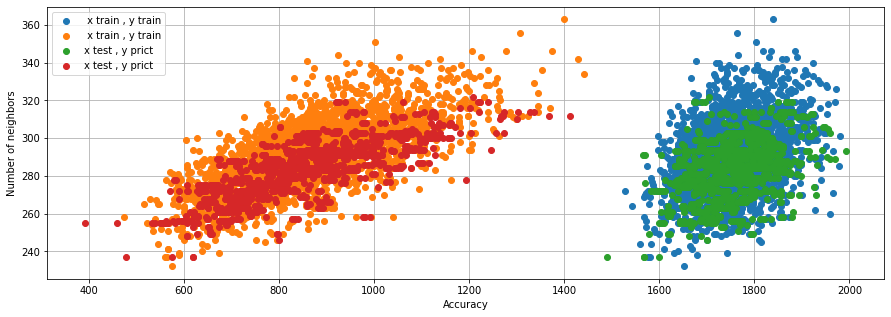

In [170]:
fig = plt.figure(figsize=(15,5))
plt.plot(x_train, y_train , 'o', label = ' x train , y train')
plt.plot(x_test ,y_prict , 'o' , label = 'x test , y prict' )
plt.legend() ## label inside
plt.xlabel ('Accuracy')
plt.ylabel ('Number of neighbors')
plt.grid()
plt.show()